In [16]:
import pandas as pd
import numpy as np
from sqlalchemy.engine import URL
from sqlalchemy import create_engine
server = '.\SQLEXPRESS'
database = 'heart2020'

In [17]:
connection_string = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';Trusted_Connection=yes;'

connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": connection_string})

engine = create_engine(connection_url)

cnx = engine.connect()

In [18]:
df = pd.read_sql("SELECT * FROM heart2020.dbo.heart_2020", engine)


In [19]:
df['BMI'] = df['BMI'].astype(float, errors= 'raise')
df['PhysicalHealth'] = df['PhysicalHealth'].astype(float, errors= 'raise')
df['MentalHealth'] = df['MentalHealth'].astype(float, errors= 'raise')
df['SleepTime'] = df['SleepTime'].astype(float, errors= 'raise')

In [20]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,28.90,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Very good,7.0,No,No,No
1,Yes,29.16,Yes,No,Yes,0.0,0.0,No,Male,70-74,White,Yes,Yes,Fair,8.0,No,No,No
2,No,23.57,Yes,No,No,0.0,2.0,No,Male,70-74,White,No,Yes,Very good,8.0,No,No,Yes
3,No,29.23,Yes,Yes,No,0.0,3.0,No,Female,40-44,White,No,No,Good,9.0,No,No,No
4,No,27.37,No,No,No,0.0,0.0,No,Female,45-49,White,No,Yes,Excellent,6.0,No,No,No


In [21]:
df.shape

(319795, 18)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [23]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [25]:
df.BMI.value_counts()

26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
15.89       1
69.38       1
29.67       1
21.49       1
34.40       1
Name: BMI, Length: 3604, dtype: int64

In [26]:
df.BMI.describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

c:\Users\Nicolas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

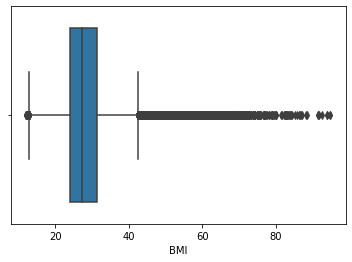

In [29]:
from seaborn import boxplot
boxplot(df.BMI)

c:\Users\Nicolas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI', ylabel='count'>

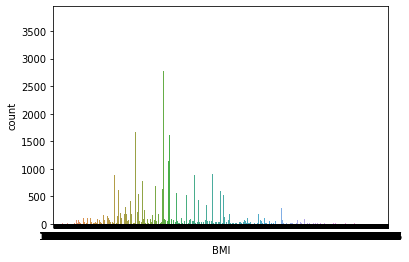

In [30]:
import seaborn as sns
sns.countplot(df['BMI'])

c:\Users\Nicolas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Nicolas\miniconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='BMI'>

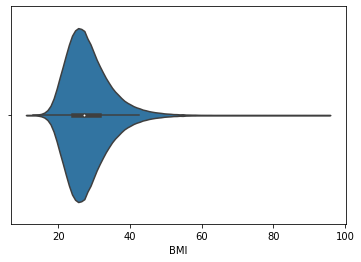

In [31]:
from seaborn import violinplot
violinplot(df.BMI, data=df , orient="v")

c:\Users\Nicolas\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SleepTime', ylabel='Density'>

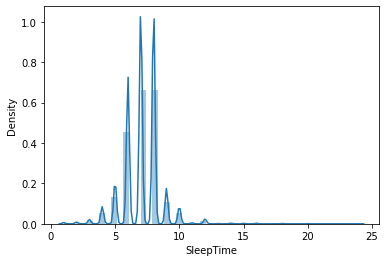

In [32]:
from seaborn import distplot
distplot(df.SleepTime)

c:\Users\Nicolas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Nicolas\miniconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='SleepTime'>

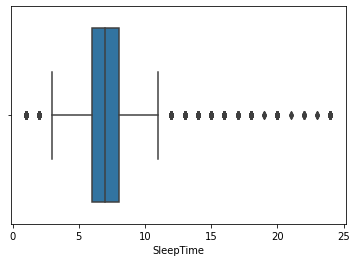

In [33]:
from seaborn import boxplot
boxplot(df.SleepTime, orient="v")

c:\Users\Nicolas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Nicolas\miniconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='SleepTime'>

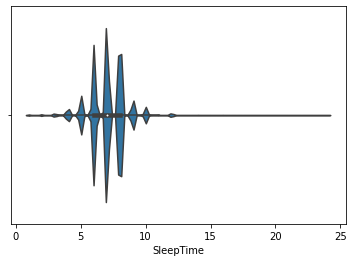

In [34]:

violinplot(df.SleepTime, data=df , orient="v")